In [7]:
import tensorflow as tf
import os

In [8]:
import cv2
import imghdr

In [12]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Emotions/data' 


In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Emotions/data')


Found 305 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()


In [19]:
#Class 0 = Happy
#Class 1 = Sad

batch = data_iterator.next()


In [20]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

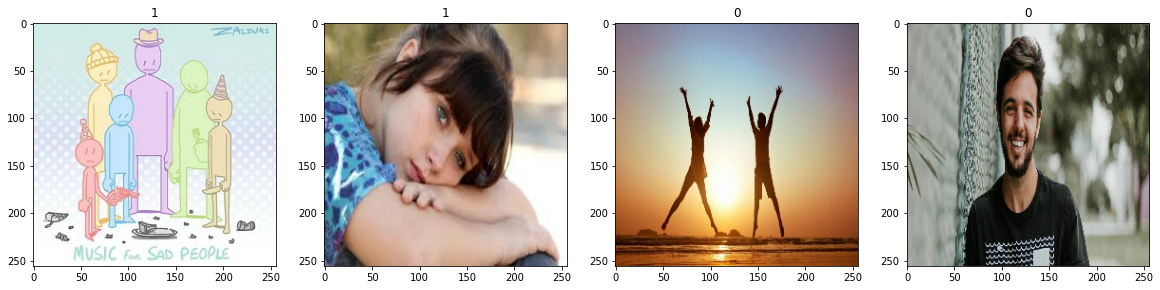

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
data = data.map(lambda x,y: (x/255, y))


In [23]:
data.as_numpy_iterator().next()


(array([[[[3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          ...,
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01]],
 
         [[3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          ...,
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01]],
 
         [[3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          [3.60784322e-01, 4.19607848e-01, 7.52941191e-01],
          ...,
          [3.60784322e-01, 4.19607848e-01, 7.5294

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size


7

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()


In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
logdir='logs'


In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 [==============================] - 16s 919ms/step - loss: 0.9316 - accuracy: 0.5536 - val_loss: 0.6659 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 5s 516ms/step - loss: 0.6616 - accuracy: 0.6607 - val_loss: 0.6387 - val_accuracy: 0.8281
Epoch 3/20
7/7 [==============================] - 8s 935ms/step - loss: 0.5713 - accuracy: 0.7857 - val_loss: 0.4456 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 5s 520ms/step - loss: 0.5956 - accuracy: 0.7098 - val_loss: 0.5595 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 5s 515ms/step - loss: 0.4900 - accuracy: 0.8705 - val_loss: 0.4948 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 8s 935ms/step - loss: 0.4279 - accuracy: 0.7991 - val_loss: 0.3188 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 5s 502ms/step - loss: 0.3052 - accuracy: 0.8973 - val_loss: 0.3163 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===

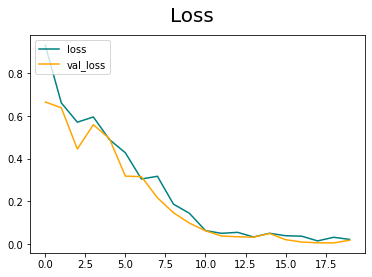

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

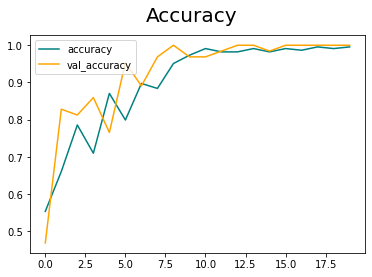

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 256ms/step


In [41]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
import cv2


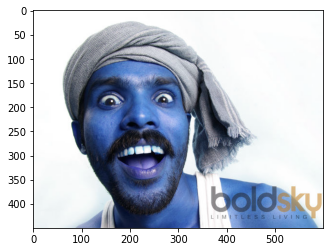

In [43]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Emotions/data/ind.jpeg')
plt.imshow(img)
plt.show()

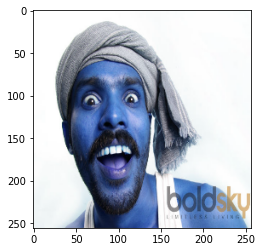

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 213ms/step


In [46]:
yhat

array([[0.35066986]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [48]:
from tensorflow.keras.models import load_model


In [49]:
model.save(os.path.join('models','imageclassifier.h5'))


In [51]:
new_model = load_model('/content/models/imageclassifier.h5')


In [52]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 121ms/step


array([[0.35066986]], dtype=float32)